# SPRINT 3 - MACHINE LEARNING

GRUPO: Echo Script


DISCENTES - RM :

Caiky de ávila Pereira Dutra (representante) - 99274

Giovanna Shiguemori Barbosa - 99105

Isabela Victória de Novais Romanato - 550234

Lucas Pinheiro de Souza - 99061

Yann Dantas - 550783


Orientador: ME. Fernando Nemec

- Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

* Dataset com as notas da pesquisa que estão presentes nos áudios de amostra

In [ ]:
df = pd.read_csv('/content/notas.csv')
df_atendidas = df
df_atendidas.head()

,Recomendação TOTVS,Suporte,Atendimento agente,Executivo de Vendas/ Administrativo e financeiro,Custos e valores,Implantação Software,Entrega Serviço,Atualização Software,Nota Unidade
0,NaN,0.0,8.0,8.0,7.0,8.0,parcialmente,7.0,7.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,7.0,8.0,NaN,NaN,9.0,parcialmente,6.0,7.0
3,9.0,6.0,NaN,7.0,NaN,NaN,total,5.0,5.0
4,10.0,9.0,10.0,NaN,9.0,9.0,total,10.0,10.0


* Verificando a presença de nulos e o balanceamento de dados

In [ ]:
df_atendidas.isnull().sum()

,0
Recomendação TOTVS,35
Suporte,36
Atendimento agente,38
Executivo de Vendas/ Administrativo e financeiro,45
Custos e valores,40
Implantação Software,52
Entrega Serviço,32
Atualização Software,34
Nota Unidade,41


* Normalização dos dados

In [ ]:
df_atendidas.dropna(subset=['Entrega Serviço'], inplace=True)

colunas_dummy = ['Entrega Serviço']
for coluna in colunas_dummy:
    valores_unicos = df_atendidas[coluna].unique()
    for valor in valores_unicos:
        dummy_coluna = f"{coluna}_{valor}_dummy"
        df_atendidas[dummy_coluna] = df_atendidas.apply(lambda row: 1 if row[coluna] == valor else 0, axis=1)
df_atendidas = df_atendidas.drop(columns=colunas_dummy)
df_atendidas = df_atendidas.drop('Entrega Serviço_parcialmente_dummy', axis=1)

* Transcrições dos áudios

In [ ]:
df = pd.read_csv('/content/transcricoes.csv')
df

,file_name,transcription
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c..."
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar..."
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ..."
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...
...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot..."
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ..."
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo..."


* Capturando todas as possíveis notas de Net Promoter Score

In [ ]:
import re

In [ ]:
texto = df['transcription'][0]
p1 = re.compile(r'zero|um|dois|três|quatro|cinco|seis|sete|oito|nove|dez')
p2 = re.compile(r'\d+')
check1=p1.findall(texto)
check2=p2.findall(texto)
print(check1)
print(check2)

['um', 'dois', 'oito', 'três', 'zero', 'quatro', 'dois', 'um', 'um', 'um', 'um', 'zero', 'cinco', 'oito', 'oito', 'sete', 'um', 'oito', 'sete', 'sete', 'zero', 'dez', 'sete', 'um', 'um', 'um', 'seis', 'um', 'um']
['0', '10', '19', '705', '1000', '0', '10', '0', '10', '0', '10', '0', '10']


In [ ]:
def extrair_notas(text):
  p1 = re.compile(r'zero|um|dois|três|quatro|cinco|seis|sete|oito|nove|dez')
  p2 = re.compile(r'0|1|2|3|4|5|6|7|8|9|10')
  check1 = p1.findall(text)
  check2 = p2.findall(text)
  return check1, check2
df[['extenso', 'numerico']] = df['transcription'].apply(lambda x: pd.Series(extrair_notas(x)))
df

,file_name,transcription,extenso,numerico
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c...","[um, dois, oito, três, zero, quatro, dois, um,...","[0, 1, 0, 1, 9, 7, 0, 5, 1, 0, 0, 0, 0, 1, 0, ..."
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...,"[um, um]",[]
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar...","[um, um, um, dois, um, um, um, seis, seis, um,...","[1, 0, 0, 7, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]"
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ...","[dois, um, nove, nove, um, um, seis, sete, set...","[1, 0, 0, 0, 1, 3, 0, 1, 0]"
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...,"[um, um, dois, um, um, dois, um, dez, um, nove...","[1, 0, 0, 0, 4, 9, 4, 9, 0, 1, 0, 0, 1, 0, 1, ..."
...,...,...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...,"[um, um, um, um, dois, dois, um, um, quatro, q...","[0, 1, 0, 2, 0, 0, 0, 5, 7, 1, 0, 0, 0, 7, 5]"
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot...","[um, um]",[]
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ...","[um, dois, um, sete, sete, sete, sete, sete, q...","[0, 1, 0, 5, 0, 1, 0, 0, 0, 2, 8, 0, 1, 0, 0, ..."
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo...","[um, um, um, um, um, um, dois, zero, um, um, o...","[4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]"


* Extraindo o nome das atendentes

In [ ]:
def extrair_atendentes(text):
  p3 = re.compile(r'beatriz|viviane|lilia')
  check3 = p3.findall(text)
  return pd.Series([check3[0] if check3 else None])
df[['atendente']] = df['transcription'].apply(lambda x: extrair_atendentes(x))
df

,file_name,transcription,extenso,numerico,atendente
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c...","[um, dois, oito, três, zero, quatro, dois, um,...","[0, 1, 0, 1, 9, 7, 0, 5, 1, 0, 0, 0, 0, 1, 0, ...",beatriz
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...,"[um, um]",[],viviane
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar...","[um, um, um, dois, um, um, um, seis, seis, um,...","[1, 0, 0, 7, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]",lilia
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ...","[dois, um, nove, nove, um, um, seis, sete, set...","[1, 0, 0, 0, 1, 3, 0, 1, 0]",None
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...,"[um, um, dois, um, um, dois, um, dez, um, nove...","[1, 0, 0, 0, 4, 9, 4, 9, 0, 1, 0, 0, 1, 0, 1, ...",lilia
...,...,...,...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...,"[um, um, um, um, dois, dois, um, um, quatro, q...","[0, 1, 0, 2, 0, 0, 0, 5, 7, 1, 0, 0, 0, 7, 5]",lilia
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot...","[um, um]",[],beatriz
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ...","[um, dois, um, sete, sete, sete, sete, sete, q...","[0, 1, 0, 5, 0, 1, 0, 0, 0, 2, 8, 0, 1, 0, 0, ...",beatriz
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo...","[um, um, um, um, um, um, dois, zero, um, um, o...","[4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]",lilia


* Extraindo o nome das empresas

In [ ]:
def extrair_empresa(text):
    nomes_empresas = r'cgc atacadista|plastico lojas br|rio hotel by bourbon maringá|conab|edifício paulista capital plaza|hot beach resort|condomínio resort|bourbon curitiba hotel|cactus|bec indústria e comércio de confecções|amaral|beacon brad|baterias|bourbon hotel fortaleza|escola comunitária de campinas|escola de ensino superior do sertão eireli|christofoletti brasil ltda|conae four english press seven|clóvis. global silvia|bahia norte hotel florianópolis|bioquímica s.a|clóvis global|br motorsport|brasil sociedade de perfurações ltda|cda central de distribuição azevedo ltda|transportadora aliança|televendas shark tratores|pepe hotel|citron|conae|assis brasil|civil construtora ltda|intercity|cabo grafite|grupo rocha|rio verde praia hotel|cna companhia de navegação da amazônia|budget luxury resorts|nápoli consultoria empresarial|blue tree premium|suco rico citrus|center glass resinas|ccb coaching s.a|núcleo y participações ltda|simbiose|centro-oeste comercial de alimentos ltda|novatec|complexo brasil|piazza navona|hotel piquiri|hot beach resort|hotel casa da montanha|atlântica hotels'
    p3 = re.compile(nomes_empresas, re.IGNORECASE)
    match = p3.search(text)

    return match.group() if match else None
df['empresa'] = df['transcription'].apply(extrair_empresa)
df

,file_name,transcription,extenso,numerico,atendente,empresa
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c...","[um, dois, oito, três, zero, quatro, dois, um,...","[0, 1, 0, 1, 9, 7, 0, 5, 1, 0, 0, 0, 0, 1, 0, ...",beatriz,cgc atacadista
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...,"[um, um]",[],viviane,plastico lojas br
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar...","[um, um, um, dois, um, um, um, seis, seis, um,...","[1, 0, 0, 7, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]",lilia,rio hotel by bourbon maringá
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ...","[dois, um, nove, nove, um, um, seis, sete, set...","[1, 0, 0, 0, 1, 3, 0, 1, 0]",None,conab
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...,"[um, um, dois, um, um, dois, um, dez, um, nove...","[1, 0, 0, 0, 4, 9, 4, 9, 0, 1, 0, 0, 1, 0, 1, ...",lilia,edifício paulista capital plaza
...,...,...,...,...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...,"[um, um, um, um, dois, dois, um, um, quatro, q...","[0, 1, 0, 2, 0, 0, 0, 5, 7, 1, 0, 0, 0, 7, 5]",lilia,hotel casa da montanha
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot...","[um, um]",[],beatriz,None
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ...","[um, dois, um, sete, sete, sete, sete, sete, q...","[0, 1, 0, 5, 0, 1, 0, 0, 0, 2, 8, 0, 1, 0, 0, ...",beatriz,None
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo...","[um, um, um, um, um, um, dois, zero, um, um, o...","[4, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]",lilia,atlântica hotels


* Dropando as colunas de números extenso e numérico

In [ ]:
df2 = df.drop(columns=['extenso', 'numerico'])
df2

,file_name,transcription,atendente,empresa
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c...",beatriz,cgc atacadista
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...,viviane,plastico lojas br
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar...",lilia,rio hotel by bourbon maringá
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ...",None,conab
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...,lilia,edifício paulista capital plaza
...,...,...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...,lilia,hotel casa da montanha
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot...",beatriz,None
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ...",beatriz,None
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo...",lilia,atlântica hotels


* Dataframe para duração de cada áudio

In [ ]:
df_audio = pd.read_csv('/content/audios.csv')
df_audio

,Nome do Arquivo,Tempo
0,2964235.wav,03:29:550
1,2964530.wav,03:29:980
2,2962625.wav,01:33:450
3,2874774.wav,05:00:420
4,2962074.wav,11:02:320
...,...,...
75,2968253.wav,02:37:940
76,2964398.wav,03:02:040
77,2966651.wav,02:46:940
78,2965979.wav,03:08:970


* Dataframe concatenado

In [ ]:
df2 = df2.merge(df_audio, left_on='file_name', right_on='Nome do Arquivo', how='left')
df2 = df2.drop('Nome do Arquivo', axis=1)
df2

,file_name,transcription,atendente,empresa,Tempo
0,2967602.wav,"alô, boa tarde. boa tarde. fala com o senhor c...",beatriz,cgc atacadista,03:00:300
1,2967344.wav,plastico lojas br. boa tarde! boa tarde. meu n...,viviane,plastico lojas br,01:40:360
2,2967631.wav,"eu tenho o bourbon. lorena, boa tarde. boa tar...",lilia,rio hotel by bourbon maringá,07:38:600
3,2965935.wav,"alô, alô, bom dia. leandro eu novamente. tudo ...",None,conab,02:44:220
4,2965979.wav,edson paulista. joão paulo. bom dia. bom dia! ...,lilia,edifício paulista capital plaza,03:08:970
...,...,...,...,...,...
75,2967729.wav,boa tarde! boa tarde lilia da empresa totvs eu...,lilia,hotel casa da montanha,02:08:780
76,2966177.wav,"alô, carneiro, bom dia! bom dia beatriz da fot...",beatriz,None,01:40:140
77,2964530.wav,"alô, alô, alô, boa tarde! boa tarde, azevedo. ...",beatriz,None,03:29:980
78,2966819.wav,"hotel ibis em são carlos. silvana, bom dia! bo...",lilia,atlântica hotels,06:21:190


In [ ]:
df2.to_csv('final.csv', index=False)

* Reconstrução do dataset para valores com nota nula
* É importante notar que nosso dataset irá ser reconstruído a prtir da nossa variável de interesse que seria a Entrega de serviço categorizada por Entrega Total ou Parcialmente

In [ ]:
dados = {
          'X1': df_atendidas['Recomendação TOTVS'],
          'X2': df_atendidas['Suporte '],
          'X3': df_atendidas['Atendimento agente'],
          'X4': df_atendidas['Executivo de Vendas/ Administrativo e financeiro'],
          'X5': df_atendidas['Custos e valores'],
          'X6': df_atendidas['Implantação Software'],
          'X7': df_atendidas['Atualização Software'],
          'X8': df_atendidas['Nota Unidade'],
          'Y': df_atendidas['Entrega Serviço_total_dummy']}
df = pd.DataFrame(dados)

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,NaN,0.0,8.0,8.0,7.0,8.0,7.0,7.0,0
2,6.0,7.0,8.0,NaN,NaN,9.0,6.0,7.0,0
3,9.0,6.0,NaN,7.0,NaN,NaN,5.0,5.0,1
4,10.0,9.0,10.0,NaN,9.0,9.0,10.0,10.0,1
7,9.0,8.0,NaN,9.0,8.0,8.0,8.0,NaN,1


* Verificando a presença de nulos

In [ ]:
df.isnull().sum()

,0
X1,4
X2,5
X3,7
X4,13
X5,9
X6,20
X7,3
X8,10
Y,0


* Aplicação de Regressão Linear e Polinomial

In [ ]:
completos = df.dropna()
incompletos = df[df.isnull().any(axis=1)]

X_completo = completos[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y_completo = completos['Y']
model = LinearRegression().fit(X_completo, y_completo)

imputador = SimpleImputer(strategy='mean')
X_imputado = imputador.fit_transform(df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])

df_imputado = pd.DataFrame(X_imputado, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
df_imputado['Y'] = imputador.fit_transform(df[['Y']])

X_final = df_imputado[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y_final = df_imputado['Y']
modelo_final = LinearRegression().fit(X_final, y_final)

In [ ]:
print(f"Coeficientes: {modelo_final.coef_}, Intercept: {modelo_final.intercept_}")
print(f"Score: {modelo_final.score(X_final, y_final)}")

Coeficientes: [ 0.03743961  0.09000564 -0.08252714  0.00530441  0.02502318  0.12606082
  0.01853027 -0.03937029], Intercept: -0.902023343621063
Score: 0.26254286004059824


* A regressão Linear obteve um r-quadrado de 0.26, o que é considerado um poder explicativo muito baixo, abaixo iremos seguir com outra regressão que pode ser mais propícia para este caso e verificar se o r-score tem uma melhora

* Aplicação de regressão polinomial

In [ ]:
imputador = SimpleImputer(strategy='mean')
X_imputado_poly = imputador.fit_transform(df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])

df_imputado_poly = pd.DataFrame(X_imputado_poly, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])
df_imputado_poly['Y'] = imputador.fit_transform(df[['Y']])

X_final_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(df_imputado_poly[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])
y_final_poly = df_imputado_poly['Y']

modelo_final_poly = LinearRegression().fit(X_final_poly, y_final_poly)

In [ ]:
print(f"Coeficientes (Polinomial): {modelo_final_poly.coef_}, Intercept (Polinomial): {modelo_final_poly.intercept_}")
print(f"Score (Polinomial): {modelo_final_poly.score(X_final_poly, y_final_poly)}")

Coeficientes (Polinomial): [ 0.12307083 -4.53217063  3.55499968  8.03803956 -4.17831509  0.51238143
  2.04080793  0.58164743 -0.42280243 -0.16796115  0.64433008  2.32893059
 -0.2464984  -0.75327262 -0.15859118 -0.92375274 -0.06172993  1.11159654
 -0.54490574  0.53910306  0.14982823 -0.62456926  0.18395391 -0.80515918
 -0.78069028 -0.05014316  0.23392882 -0.35290565  0.43829187 -1.04830564
  0.62194078  0.60013413 -0.38852281 -0.66256529  0.19304963 -1.03379437
  1.07571046 -0.73845167  0.4809043  -0.79110342  0.4633967  -0.18893435
  1.45438074 -0.09437967], Intercept (Polinomial): -28.327448448129136
Score (Polinomial): 0.9415923654751844


* Como dito anteriormente, a regressão Polinomial performou melhor que a regressão linear obtendo um r-quadrado de 0.94, o que é considerado um alto poder explicativo

* Aplicaremos essa mesma regressão para reconstrução de nosso dataset, como mostra o Dataframe abaixo

In [ ]:
df_imputado_poly.round()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,8.0,0.0,8.0,8.0,7.0,8.0,7.0,7.0,0.0
1,6.0,7.0,8.0,8.0,7.0,9.0,6.0,7.0,0.0
2,9.0,6.0,8.0,7.0,7.0,8.0,5.0,5.0,1.0
3,10.0,9.0,10.0,8.0,9.0,9.0,10.0,10.0,1.0
4,9.0,8.0,8.0,9.0,8.0,8.0,8.0,8.0,1.0
5,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0
6,8.0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,0.0
7,8.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,1.0
8,0.0,8.0,8.0,5.0,5.0,5.0,10.0,7.0,0.0
9,10.0,8.0,10.0,8.0,8.0,8.0,10.0,10.0,1.0


* Iremos fazer a dummização das colunas necessárias, nesse caso iremos usar a coluna Entrega de serviço pois ela éa única categórica das demais

In [ ]:
df_imputado_poly.columns = df_atendidas.columns[:9]
df_imputado_poly.columns

Index(['Recomendação TOTVS', 'Suporte ', 'Atendimento agente',
       'Executivo de Vendas/ Administrativo e financeiro', 'Custos e valores',
       'Implantação Software', 'Atualização Software', 'Nota Unidade',
       'Entrega Serviço_total_dummy'],
      dtype='object')

In [ ]:
df = df_imputado_poly.round()
df = df.rename(columns={'Entrega Serviço_total_dummy': 'Entrega Serviço'})
df

,Recomendação TOTVS,Suporte,Atendimento agente,Executivo de Vendas/ Administrativo e financeiro,Custos e valores,Implantação Software,Atualização Software,Nota Unidade,Entrega Serviço
0,8.0,0.0,8.0,8.0,7.0,8.0,7.0,7.0,0.0
1,6.0,7.0,8.0,8.0,7.0,9.0,6.0,7.0,0.0
2,9.0,6.0,8.0,7.0,7.0,8.0,5.0,5.0,1.0
3,10.0,9.0,10.0,8.0,9.0,9.0,10.0,10.0,1.0
4,9.0,8.0,8.0,9.0,8.0,8.0,8.0,8.0,1.0
5,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0
6,8.0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,0.0
7,8.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,1.0
8,0.0,8.0,8.0,5.0,5.0,5.0,10.0,7.0,0.0
9,10.0,8.0,10.0,8.0,8.0,8.0,10.0,10.0,1.0


# Cálculo Net Promoter Score e avaliação
* O critério de avaliação foi a soma de todas as notas e armazenamento desse resultado, a partir do mesmo calculamos o percentual médio das notas para cada registr, ele divide a soma das notas pela quantidade de colunas presentes no Dataframe e multiplica por 100 para obter o percentual
* Calculamos a mediana dos percentuais
* E categorizamos o percentual como 1 representando os Promotores, 0 se o percentual for menor que a mediana representando os clientes neutros, e 0.5 representando os clientes detratores

In [ ]:
df['Soma das Notas'] = df.sum(axis=1)
df['Percentual'] = (df['Soma das Notas'] / len(df.columns)) * 100
mediana = df['Percentual'].median()
df['Classe percentual'] = df['Percentual'].apply(lambda x: 1 if x > mediana else (0 if x < mediana * 0.5 else 0.5))
df = df.drop(columns=['Soma das Notas', 'Percentual'])
def categorize_nps(row):
  if row['Classe percentual'] == 1:
    return 'Promotor'
  elif row['Classe percentual'] == 0:
    return 'Detrator'
  else:
    return 'Neutro'
df['Categoria NPS'] = df.apply(categorize_nps, axis=1)
df.drop(columns=['Classe percentual'], inplace=True)
df

,Recomendação TOTVS,Suporte,Atendimento agente,Executivo de Vendas/ Administrativo e financeiro,Custos e valores,Implantação Software,Atualização Software,Nota Unidade,Entrega Serviço,Categoria NPS
0,8.0,0.0,8.0,8.0,7.0,8.0,7.0,7.0,0.0,Neutro
1,6.0,7.0,8.0,8.0,7.0,9.0,6.0,7.0,0.0,Neutro
2,9.0,6.0,8.0,7.0,7.0,8.0,5.0,5.0,1.0,Neutro
3,10.0,9.0,10.0,8.0,9.0,9.0,10.0,10.0,1.0,Promotor
4,9.0,8.0,8.0,9.0,8.0,8.0,8.0,8.0,1.0,Promotor
5,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,Neutro
6,8.0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,0.0,Neutro
7,8.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,1.0,Neutro
8,0.0,8.0,8.0,5.0,5.0,5.0,10.0,7.0,0.0,Neutro
9,10.0,8.0,10.0,8.0,8.0,8.0,10.0,10.0,1.0,Promotor


* Plotagem do gráfico

* Aqui podemos ter uma noção maior, de como nosso dados estão organizados, fazendo através do gráfico a categorização de nossos clientes por cores, Neutro representa a cor roxa, promotor é representado pela cor verde, e seguinte Detrator pla cor amarela

In [ ]:
contagem_categorias = df['Categoria NPS'].value_counts()
import plotly.express as px
fig = px.bar(
    x=contagem_categorias.index,
    y=contagem_categorias.values,
    labels={"x": "Categoria NPS", "y": "Quantidade"},
    title="Distribuição das Categorias NPS",
    color=contagem_categorias.index,
    color_discrete_map={'Promotor': 'green', 'Detrator': 'yellow', 'Neutro': 'purple'},
    width=800,
    height=600
)
fig.show()

* Podemos notar que ao avaliar o Net Promoter score para as ligações atendidas, foi constatado o mesmo número de possíveis clientes Neutro e promotores e apenas dois são considerados detratores

In [ ]:
df.to_csv('nps.csv', index=False)

- Aplicando Árvore de Decisão para 'Categoria NPS'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_log_loss = DecisionTreeClassifier(criterion='log_loss', random_state=42)

model_gini.fit(X_train, y_train)
model_log_loss.fit(X_train, y_train)

y_pred_gini = model_gini.predict(X_test)
y_pred_log_loss = model_log_loss.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Acurácia da Árvore de Decisão (Gini): {accuracy_gini}")

accuracy_log_loss = accuracy_score(y_test, y_pred_log_loss)
print(f"Acurácia da Árvore de Decisão (Log Loss): {accuracy_log_loss}")


Acurácia da Árvore de Decisão (Gini): 0.6
Acurácia da Árvore de Decisão (Log Loss): 0.7


* Ao aplicarmos a árvore de decisão, para os critérios avaliados de Gini obtemos uma acurácia de 0.6, já para Log loss obtemos uma acurácia de 0.7

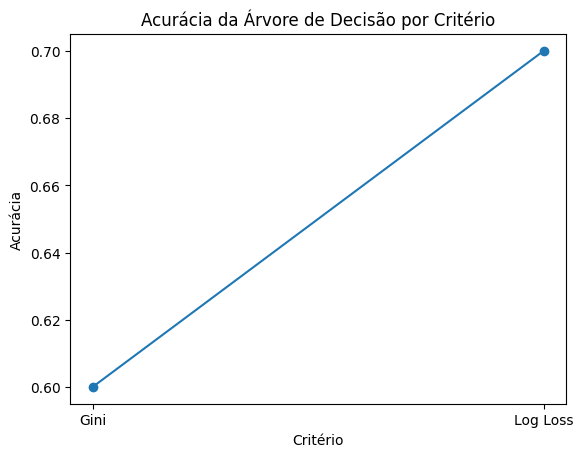

In [ ]:
acuracias = [accuracy_gini, accuracy_log_loss]
criterios = ['Gini', 'Log Loss']

plt.plot(criterios, acuracias, marker='o')

plt.xlabel('Critério')
plt.ylabel('Acurácia')
plt.title('Acurácia da Árvore de Decisão por Critério')

plt.show()


- Aplicando Randow Forest para 'Categoria NPS'

In [ ]:
X = df[['Recomendação TOTVS', 'Suporte ', 'Atendimento agente', 'Executivo de Vendas/ Administrativo e financeiro',
        'Custos e valores', 'Implantação Software', 'Atualização Software', 'Nota Unidade']]
y = df['Categoria NPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_log_loss = DecisionTreeClassifier(criterion='log_loss', random_state=42)


model_gini.fit(X_train, y_train)
model_log_loss.fit(X_train, y_train)

y_pred_gini = model_gini.predict(X_test)
y_pred_log_loss = model_log_loss.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Acurácia da Árvore de Decisão (Gini): {accuracy_gini}")

# Avaliar o modelo com critério Log Loss
accuracy_log_loss = accuracy_score(y_test, y_pred_log_loss)
print(f"Acurácia da Árvore de Decisão (Log Loss): {accuracy_log_loss}")


Acurácia da Árvore de Decisão (Gini): 0.6
Acurácia da Árvore de Decisão (Log Loss): 0.7


* Testamos com um modelo diferente, dessa vez aplicamos Random Forest, mas o cenário não mudou, obtemos os mesmos resultados para ambos os critérios

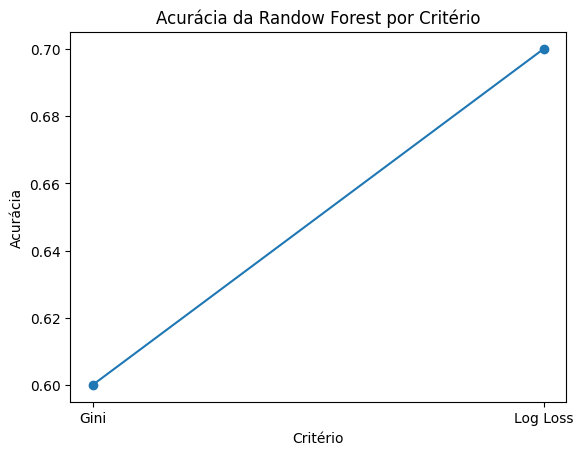

In [ ]:
acuracias = [accuracy_gini, accuracy_log_loss]
criterios = ['Gini', 'Log Loss']

plt.plot(criterios, acuracias, marker='o', linestyle='-')

plt.xlabel('Critério')
plt.ylabel('Acurácia')
plt.title('Acurácia da Randow Forest por Critério')

plt.show()

- Matriz de Confusão

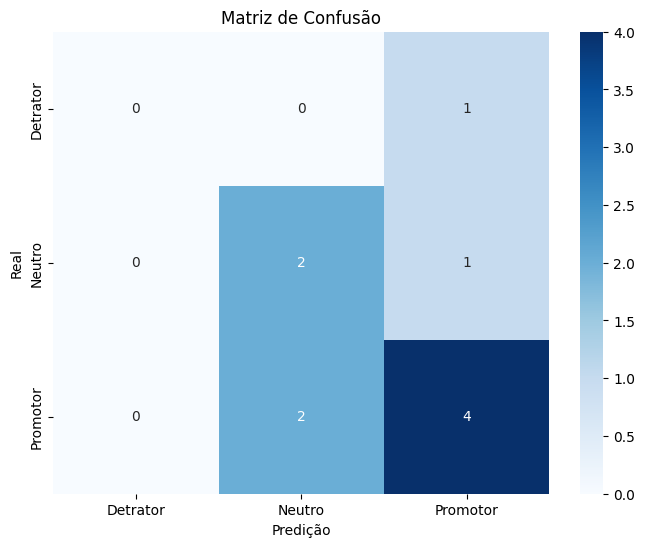

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Detrator', 'Neutro', 'Promotor'],
            yticklabels=['Detrator', 'Neutro', 'Promotor'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

* A matriz de confusão foi útil para avaliar o desempenho do modelo,especialmente pois nosso conjunto de dados era desbalanceado